# Distribuciones Muestrales


Cuando se selecciona una muestra aleatoria de una población, las medidas numéricas
descriptivas que se calculen de la muestra se denominan estadísticas. Las estadísticas varían o cambian para cada muestra aleatoria diferente que se escoja; esto es, son
variables aleatorias. Las distribuciones de probabilidad para estadísticas se llaman distribuciones muestrales porque, en muestreos repetidos, dan esta información:

- Qué valores de la estadística pueden presentarse
- Con qué frecuencia se presenta cada valor

La **distribución muestral de una estadística** es la distribución de probabilidad para los posibles valores de la estadística, que resulta cuando muestras aleatorias de tamaño *n* se sacan repetidamente de la población.




## Ejemplo 

Deduciremos la distribución  de probabilidad del lanzamiento de un dado.
sea $x$ la variable aleatoria: valor obtenido al lanzar un dado.

| $x$    | 1   | 2   | 3   | 4   | 5   | 6   |
|--------|-----|-----|-----|-----|-----|-----|
| $P(x)$ | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

el gráfico de la distribución de probabilidad será:

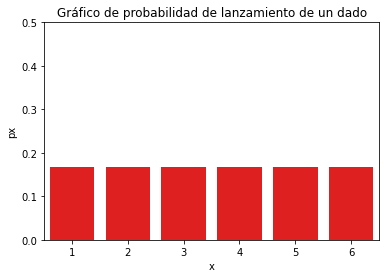

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x = [1, 2, 3, 4, 5, 6]
px = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

data = pd.DataFrame({'x': x, 'px': px})
sns.barplot(x='x', y='px', data=data, color='red')

plt.ylim(0, 0.5)
plt.title('Gráfico de probabilidad de lanzamiento de un dado')

plt.show()

Realicemos el lanzaiento de 2 dados y encontremos su valor promedio

In [2]:
import random
import numpy as np

x = [1, 2, 3, 4, 5, 6]
dados2 = random.choices(x, k=2)
print(dados2)  # lanzamiento de 2 dados, los dados pueden tomar el mismo valor

media = np.mean(dados2)
media  # cálculo del promedio del lanzamiento de los 2 dados

[2, 6]


4.0

¿que sucede si se realiza el lanzamiento de los dados en muchas ocaciones, digamos 100?


para esto identificaremos la función ```for ``` en python

In [4]:
for i in range(1, 6):
    print(i)

1
2
3
4
5


los valores son:
- función ```for() ``` la cual es la identificación de un ciclo
- valor ```i in range(1,6)``` indica desde donde inicia hasta donde termina el ciclo y cual es el valor de indexación
- ```{ f(i) }``` función que será aplicada de manera ciclica

In [10]:

dados = np.empty((10, 2))
media = []

for i in range(10):
    dados[i, :] = np.random.choice(x, size=2, replace=True)
    media.append(np.mean(dados[i, :]))

dados=pd.DataFrame(dados)
dados['Media']=dados.mean(axis=1)
dados

,0,1,Media
0,6.0,4.0,5.0
1,5.0,2.0,3.5
2,3.0,4.0,3.5
3,2.0,1.0,1.5
4,3.0,1.0,2.0
5,2.0,4.0,3.0
6,2.0,6.0,4.0
7,3.0,3.0,3.0
8,1.0,1.0,1.0
9,2.0,5.0,3.5


###  Ejercicio: realice la edición del código para realizar 100 simulaciones del lanzamiento de  3 dados.

In [14]:

dados = np.empty((100, 3))
media = []

for i in range(100):
    dados[i, :] = np.random.choice(x, size=3, replace=True)
    media.append(np.mean(dados[i, :]))

dados=pd.DataFrame(dados)
dados['Media']=dados.mean(axis=1)
dados

,0,1,2,Media
0,4.0,3.0,2.0,3.000000
1,5.0,5.0,1.0,3.666667
2,6.0,2.0,1.0,3.000000
3,5.0,1.0,5.0,3.666667
4,3.0,5.0,1.0,3.000000
...,...,...,...,...
95,6.0,4.0,5.0,5.000000
96,1.0,4.0,6.0,3.666667
97,4.0,3.0,2.0,3.000000
98,4.0,1.0,6.0,3.666667


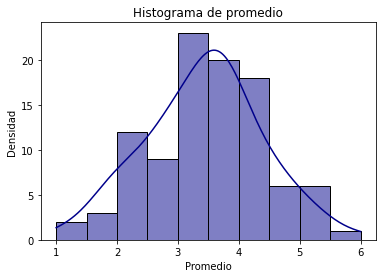

In [16]:

sns.histplot(media, bins=10, color='darkblue', kde=True)
plt.title("Histograma de promedio")
plt.xlabel("Promedio")
plt.ylabel("Densidad")
plt.show()

## Teorema del Límite Central

Si muestras aleatorias de *n* observaciones se sacan de una población no normal con
media finita $\mu$ y desviación estándar $\sigma$, entonces, cuando *n* es grande, la distribución de
muestreo de la media muestral $\bar{x}$  está distribuida normalmente en forma aproximada, con media $\mu$ y desviación estándar $\frac{\sigma}{\sqrt{n}}$.

 La aproximación se hace más precisa cuando n se hace grande.

### ¿CÓMO DETERMINO CUÁNDO EL TAMAÑO MUESTRAL ES LO SUFICIENTE GRANDE?
- Si la población muestreada es normal, entonces la distribución muestral de x  también será normal, sin importar cuál sea el tamaño de la muestra que se escoja. Este resultado se puede demostrar en forma teórica, pero no debe ser demasiado 
difícil aceptarla sin prueba.
-  Cuando la población muestreada es aproximadamente simétrica, la distribución muestral de x  se hace también aproximadamente normal para valores relativamente pequeños de *n*. Recuerde la rapidez con la que la distribución “plana” del ejemplo de los dados tomó la forma de montículo *(n=3)*.
- Cuando la población muestreada está sesgada, el tamaño muestral *n* debe ser más grande, con *n* al menos 30 antes que la distribución muestral de *x*  se haga aproximadamente normal

##  LA DISTRIBUCIÓN MUESTRAL DE LA MEDIA MUESTRAL $(\bar{x})$.

Si una muestra aleatoria de *n* mediciones se selecciona de una población con media $\mu$ y desviación estándar $\sigma$, la distribución muestral de la media muestral $\bar{x}$  tendrá media $\mu$ y desviación estándar $\frac{\sigma}{\sqrt{n}}$.

Si la población tiene una distribución normal, la distribución muestral de $\bar{x}$  estará
exactamente distribuida en forma normal, cualquiera que sea el tamaño muestral
*n*.

Si la distribución poblacional es no normal, la distribución muestral de $\bar{x}  estará distribuida normalmente en forma aproximada para muestras grandes (por el teorema del límite central).

### Error estándar

La desviación estándar de una estadística empleada como estimador de un parámetro poblacional también se denomina error estándar del estimador (abreviado SE) porque se refiere a la precisión denomina. Por tanto, la desviación estándar de $\bar{x}$
, dada por $\frac{\sigma}{\sqrt{n}}$ , se conoce como error estándar de la media (abreviada $SE(\bar{x})$ o
sólo $SE$).

### Ejemplo 

La duración de la enfermedad de Alzheimer desde el principio de síntomas hasta el fallecimiento varía de 3 a 20 años; el promedio es $8$ años con una desviación estándar de 4
años. El administrador de un gran centro médico al azar selecciona los registros médicos
de 30 pacientes de Alzheimer ya fallecidos, de la base de datos del centro médico y anota
la duración promedio. Encuentre las probabilidades aproximadas para estos eventos:

1. La duración promedio es menor a $7$ años.
2. La duración promedio excede de $7$ años.
3. La duración promedio está a no más de 1 año de la media poblacional $\mu= 8$


##  Ejercicio 
De acuerdo con un estudio del Internal Revenue Service, los contribuyentes tardan $330$ minutos
en promedio en preparar, copiar y archivar en un medio electrónico la forma fiscal $1040$. Esta distribución de tiempos se rige por una distribución normal, y la desviación estándar es de 80 minutos. Un organismo de control selecciona una muestra aleatoria de 40 consumidores.
1. ¿Cuál es el error estándar de la media de este ejemplo?
2. ¿Cuál es la probabilidad de que la media de la muestra sea mayor que $320$ minutos?
3. ¿Cuál es la probabilidad de que la media de la muestra se encuentre entre $320$ y $350$ minutos?
4. ¿Cuál es la probabilidad de que la media de la muestra sea superior que $350$ minutos?

## DISTRIBUCIÓN MUESTRAL DE LA PROPORCIÓN MUESTRAL (p)

Si una muestra aleatoria de $n$ observaciones se selecciona de una población binomial con parámetro $\pi$, entonces la distribución muestral de la proporción muestral

$$p=\frac{x}{n}$$
tendrá una media $\pi$ y una desviación estándar $SE(p)=\sqrt{\frac{\pi(1-\pi)}{n}}$
Cuando el tamaño muestral $n$ es grande, la distribución muestral de $p$ puede ser
aproximada por una distribución normal. La aproximación será adecuada si $n\pi >
5$ y $n(1-\pi)> 5$.

### Ejemplo 
En una encuesta, a 500 madres y padres se les preguntó sobre la importancia del deporte
para hijos e hijas. De los padres entrevistados, 60% estuvieron de acuerdo que los géneros son iguales y deben tener iguales oportunidades de participar en deportes. Describa la distribución muestral de la proporción muestral $p$ de padres que están de acuerdo en que los géneros son iguales y deben tener iguales oportunidades.

### Ejercicio 

¿Es usted un “puritano” del
chocolate, o le gustan otros ingredientes en su chocolate?
American Demographics informa que casi $75\%$ de
los consumidores gustan de ingredientes tradicionales
como nueces o caramelos en su chocolate. Son menos 
entusiastas hacia el gusto de la menta o el café, que dan
sabores más distintivos. Una muestra aleatoria de $200$
consumidores se selecciona y se registra el número de
quienes gustan de las nueces o caramelo en su chocolate.

1. ¿Cuál es la distribución muestral aproximada para la proporción muestral $p$? ¿Cuáles son la media y
distribución estándar para esta distribución?
2.  ¿Cuál es la probabilidad de que el porcentaje muestral sea mayor a $80\%$?
3.  ¿Dentro de qué límites se esperaría que la proporción muestral se encuentre alrededor de $95\%$ del tiempo? 